# LAB 2: GRADIENT DESCENT PRINCIPLES

## 1. GRADIENT DESCENT METHODS

## EXERCISE 1.1: A SIMPLE QUADRATIC FUNCTION

In [77]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
def f(x):
    return x[0]**2 + x[1]**2

In [3]:
def gradf(x):
    return 2*x

In [4]:
def gradient_descent(x_0, gradf, alpha=0.1, n=100):
    x = x_0
    y = [x]
    
    for _ in range(n):
        x = x - alpha * gradf(x)
        y.append(x)
    return x, np.array(y)

In [5]:
x_0 = np.array([30, 40])
sol1, path_1 = gradient_descent(x_0, gradf)

x_0 = np.array([-12, 5])
sol2, path_2 = gradient_descent(x_0, gradf)

x_0=np.array([0,-40])
sol3, path_3 = gradient_descent(x_0, gradf)

In [6]:
def sol_paths(f,paths, xr=(-50,50),yr=(-50,50),step=0.05):
    X = np.arange(*xr, step)
    Y = np.arange(*yr, step)
    X, Y = np.meshgrid(X, Y)
    XY = np.array([X.ravel(), Y.ravel()])
    Z = f(XY).reshape(X.shape)

    # Contour plot en 2D

    plt.figure()
    plt.contour(X, Y, Z, 50)
    
    for path in paths:
        plt.plot(path[:, 0], path[:, 1], 'o-')
    

    plt.show()

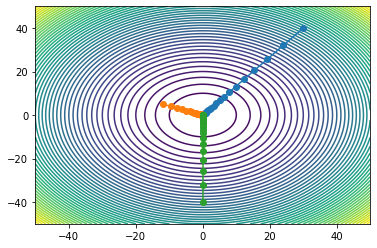

[6.11110793e-09 8.14814391e-09]
[-2.44444317e-09  1.01851799e-09]
[ 0.00000000e+00 -8.14814391e-09]


In [7]:
sol_paths(f, [path_1, path_2, path_3])
print(sol1)
print(sol2)
print(sol3)

Now, we will change the step size, choose a bigger one and see what happens.

In [8]:
x_0 = np.array([30, 40])
sol1, path_1 = gradient_descent(x_0, gradf, 1)

x_0 = np.array([-12, 5])
sol2, path_2 = gradient_descent(x_0, gradf, 1)

x_0=np.array([0,-40])
sol3, path_3 = gradient_descent(x_0, gradf, 1)

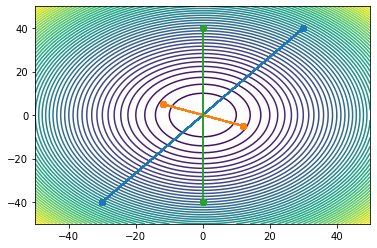

[30 40]
[-12   5]
[  0 -40]


In [9]:
sol_paths(f, [path_1, path_2, path_3])
print(sol1)
print(sol2)
print(sol3)

In [10]:
x_0 = np.array([30, 40])
sol1, path_1 = gradient_descent(x_0, gradf, 2)

x_0 = np.array([-12, 5])
sol2, path_2 = gradient_descent(x_0, gradf, 2)

x_0=np.array([0,-40])
sol3, path_3 = gradient_descent(x_0, gradf, 2)

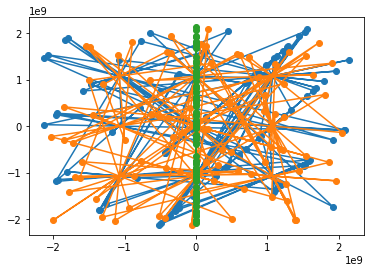

[1217548926 1623398568]
[1230967348  202924821]
[          0 -1623398568]


In [11]:
sol_paths(f, [path_1, path_2, path_3])
print(sol1)
print(sol2)
print(sol3)

## EXERCISE 1.2: A MORE COMPLEX FUNCTION

In [90]:
def f(x):
    return (x[0]**2)*(4-2.1*x[0]**2+1/3*x[0]**4)+x[0]*x[1]+(-1+x[1]**2)*4*x[1]**2

In [91]:
def gradf(x):
    return np.array([8*x[0] - 8.4*x[0]**3 + 2*x[0]**5 + x[1], x[0] - 8*x[1] + 16*x[1]**3])

In [14]:
def stream_flow(f,gradf, xr=(-50,50),yr=(-50,50),step=0.05):
    X = np.arange(*xr, step)
    Y = np.arange(*yr, step)
    X, Y = np.meshgrid(X, Y)
    XY = np.array([X.ravel(), Y.ravel()])
    print(XY.shape)
    Z = f(XY).reshape(X.shape)

    # Contour plot en 2D

    plt.figure()
    plt.contour(X, Y, Z, 50)

    # Stream flow
    
    grad=gradf(XY).reshape(XY.shape)
    print(grad.shape)
    print(X.shape)
    print(grad[:, 0])
    
    plt.streamplot(X, Y, grad[:, 0].reshape(X.shape), grad[:, 1].reshape(Y.shape))
    
    plt.show()

(2, 3321)
(2, 3321)
(41, 81)
[-13.8 -10. ]


ValueError: cannot reshape array of size 2 into shape (41,81)

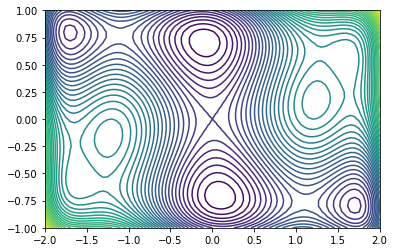

In [15]:
stream_flow(f,gradf,(-2,2.05),(-1,1.05))

In [16]:
x_0 = np.array([0, 0])
sol1, path_1 = gradient_descent(x_0, gradf)

x_0 = np.array([0, 0.5])
sol2, path_2 = gradient_descent(x_0, gradf)

x_0=np.array([0,-0.5])
sol3, path_3 = gradient_descent(x_0, gradf)

x_0 = np.array([1.25, -0.5])
sol4, path_4 = gradient_descent(x_0, gradf)

x_0=np.array([1.25,0.25])
sol5, path_5 = gradient_descent(x_0, gradf)

x_0=np.array([-1,0.4])
sol6, path_6 = gradient_descent(x_0, gradf)

x_0=np.array([-1.75,0.5])
sol7, path_7 = gradient_descent(x_0, gradf)

x_0=np.array([-0.6,-0.5])
sol8, path_8 = gradient_descent(x_0, gradf)

x_0=np.array([0.6,-0.25])
sol9, path_9 = gradient_descent(x_0, gradf)




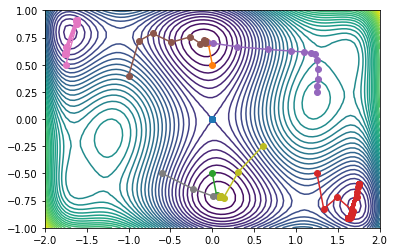

[0. 0.]
[-0.08984201  0.7126564 ]
[ 0.08984201 -0.7126564 ]
[ 1.75451546 -0.59562251]
[-0.08984201  0.7126564 ]
[-0.08984201  0.7126564 ]
[-1.75451546  0.59562251]
[ 0.08984201 -0.7126564 ]
[ 0.08984201 -0.7126564 ]


In [17]:
sol_paths(f, [path_1, path_2, path_3, path_4, path_5, path_6, path_7, path_8, path_9],(-2,2.05),(-1,1.05))
print(sol1)
print(sol2)
print(sol3)
print(sol4)
print(sol5)
print(sol6)
print(sol7)
print(sol8)
print(sol9)


In [92]:
def adapting_gradient_descent(x_0, f, gradf, tol=1e-5):
    n=0
    x=x_0
    y=[x]
    alpha=1
    
    while(np.linalg.norm(gradf(x))>=tol):
        alpha=1
        while(f(x-alpha*gradf(x))-f(x)>=0):
            alpha=alpha/2
        n=n+1
        x=x-alpha*gradf(x)
        y.append(x)
    
    return(x, np.array(y), n)

In [93]:
x_0=np.array([1.25,-0.25])
sol0, path_0,n= adapting_gradient_descent(x_0, f, gradf)

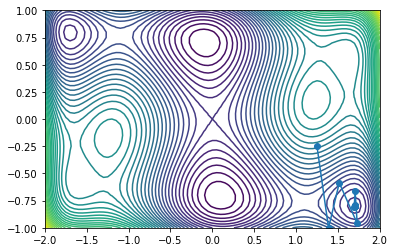

18


In [94]:
sol_paths(f, [path_0],(-2,2.05),(-1,1.05))
print(n)

In [95]:
x_0 = np.array([0, 0])
sol1, path_1, n1 = adapting_gradient_descent(x_0, f, gradf)

x_0 = np.array([0, 0.5])
sol2, path_2, n2 = adapting_gradient_descent(x_0, f, gradf)

x_0=np.array([0,-0.5])
sol3, path_3, n3 = adapting_gradient_descent(x_0, f, gradf)

x_0 = np.array([1.25, -0.5])
sol4, path_4, n4 = adapting_gradient_descent(x_0, f, gradf)

x_0=np.array([1.25,0.25])
sol5, path_5, n5 = adapting_gradient_descent(x_0, f, gradf)

x_0=np.array([-1,0.4])
sol6, path_6, n6 = adapting_gradient_descent(x_0, f, gradf)

x_0=np.array([-1.75,0.5])
sol7, path_7, n7 = adapting_gradient_descent(x_0, f, gradf)

x_0=np.array([-0.6,-0.5])
sol8, path_8, n8 = adapting_gradient_descent(x_0, f, gradf)

x_0=np.array([0.6,-0.25])
sol9, path_9, n9 = adapting_gradient_descent(x_0, f, gradf)

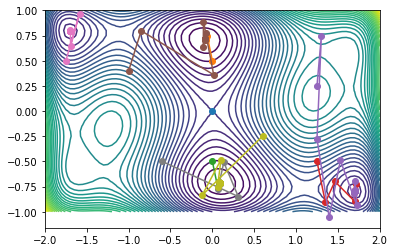

[0 0]
[-0.08984193  0.7126562 ]
[ 0.08984193 -0.7126562 ]
[ 1.70360678 -0.79608335]
[ 1.70360678 -0.79608334]
[-0.08984157  0.71265646]
[-1.70360663  0.79608386]
[ 0.08984197 -0.71265588]
[ 0.08984193 -0.71265615]
n_1= 0
n_2= 8
n_3= 8
n_4= 18
n_5= 20
n_6= 11
n_7= 15
n_8= 10
n_9= 10


In [96]:
sol_paths(f, [path_1, path_2, path_3, path_4, path_5, path_6, path_7, path_8, path_9],(-2,2.05),(-1,1.05))
print(sol1)
print(sol2)
print(sol3)
print(sol4)
print(sol5)
print(sol6)
print(sol7)
print(sol8)
print(sol9)
print('n_1=',n1)
print('n_2=',n2)
print('n_3=',n3)
print('n_4=',n4)
print('n_5=',n5)
print('n_6=',n6)
print('n_7=',n7)
print('n_8=',n8)
print('n_9=',n9)


## EXERCISE 1.3: THE ROSENBROCK FUNCTION

In [97]:
def f(x):
    return (1-x[0])**2+100*(x[1]-x[0]**2)**2

In [98]:
def gradf(x):
    return np.array([-2*(1-x[0])-400*(x[1]-x[0]**2)*x[0],200*(x[1]-x[0]**2)])

(2, 22000)
(2, 22000)
(220, 100)
[-4006. -1000.]


ValueError: cannot reshape array of size 2 into shape (220,100)

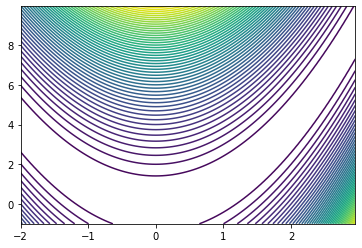

In [99]:
stream_flow(f,gradf,(-2,3),(-1,10))

## 2. NEWTON DESCENT METHOD

## 2.1: A SIMPLE QUADRATIC FUNCTION

In [100]:
def f(x):
    return 100*x[0]**2+x[1]**2

In [101]:
def gradf(x):
    return np.array([200*x[0],2*x[1]])

In [102]:
def hessf(x):
    return np.array([[200,0],[0,2]])

We will first try the gradient descent algorithm from before, with tolerance 0.001. Then, we will lower it and see what happens (since it fails otherwise).

In [106]:
x_0 = np.array([-20, 0])
sol1, path_1, n1 = adapting_gradient_descent(x_0, f, gradf)

x_0 = np.array([14, 40])
sol2, path_2, n2 = adapting_gradient_descent(x_0, f, gradf)


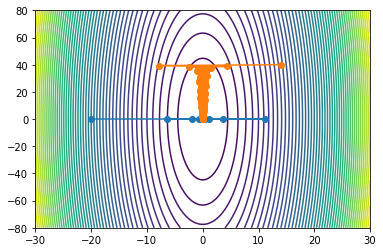

[3.591852e-08 0.000000e+00]
[-3.17076726e-08  3.85829819e-06]
n_1= 35
n_2= 723


In [107]:
sol_paths(f, [path_1, path_2],(-30,30.05),(-80,80.05))
print(sol1)
print(sol2)
print('n_1=',n1)
print('n_2=',n2)

In [108]:
x_0 = np.array([-20, 0])
sol1, path_1, n1 = adapting_gradient_descent(x_0, f, gradf, 1e-7)

x_0 = np.array([14, 40])
sol2, path_2, n2 = adapting_gradient_descent(x_0, f, gradf, 1e-7)


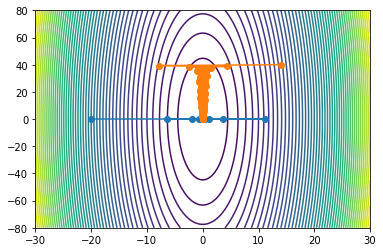

[3.59996806e-10 0.00000000e+00]
[3.13573913e-10 3.56783898e-08]
n_1= 43
n_2= 932


In [109]:
sol_paths(f, [path_1, path_2],(-30,30.05),(-80,80.05))
print(sol1)
print(sol2)
print('n_1=',n1)
print('n_2=',n2)

In [116]:
def newton_method(x_0, f, gradf, hessf, tol=1e-5):
    
    # Initial data
    x=x_0
    y=[x]
    n=0
    alpha=1
    
    # Following steps
    while(np.linalg.norm(gradf(x))>=tol):
        alpha=1
        d=np.linalg.solve(hessf(x),-gradf(x))
        while(f(x+alpha*d)-f(x)>=0):
            alpha=alpha/2
        n=n+1
        x=x+alpha*d
        y.append(x)
    

    return(x, np.array(y), n)    
    

In [117]:
x_0 = np.array([-20, 0])
sol1, path_1, n1 = newton_method(x_0, f, gradf, hessf)

x_0 = np.array([14, 40])
sol2, path_2, n2 = newton_method(x_0, f, gradf, hessf)


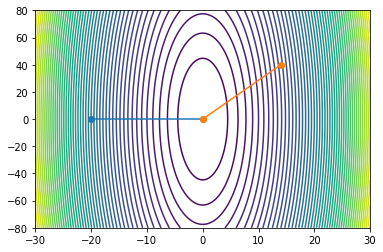

[0. 0.]
[0. 0.]
n_1= 1
n_2= 1


In [118]:
sol_paths(f, [path_1, path_2],(-30,30.05),(-80,80.05))
print(sol1)
print(sol2)
print('n_1=',n1)
print('n_2=',n2)

## 2.2: A MORE COMPLEX FUNCTION

In [119]:
def f(x):
    return (x[0]**2)*(4-2.1*x[0]**2+1/3*x[0]**4)+x[0]*x[1]+(-1+x[1]**2)*4*x[1]**2

In [120]:
def gradf(x):
    return np.array([8*x[0] - 8.4*x[0]**3 + 2*x[0]**5 + x[1], x[0] - 8*x[1] + 16*x[1]**3])

In [121]:
def hessf(x):
    return np.array([[8 - 25.2*x[0]**2 + 10*x[0]**4, 1], [1, -8 + 48*x[1]**2]])

Using pure gradient descent

In [122]:
x_0=np.array([-1,0.4])
sol, path, n = adapting_gradient_descent(x_0, f, gradf)

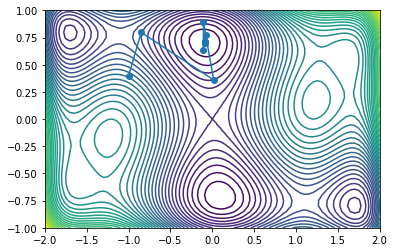

[-0.08984157  0.71265646]
n= 11


In [123]:
sol_paths(f, [path],(-2,2.05),(-1,1.05))
print(sol)
print('n=',n)

Using the Newton-gradient descent method

In [124]:
def combined_newton_gd(x_0, f, gradf, hessf, tol=1e-5):
    n=0
    x=x_0
    y=[x]
    alpha=1
    
    while(np.linalg.norm(gradf(x))>=tol):
        alpha=1
        n=n+1
        (lambda1,lambda2)=np.linalg.eigvals(hessf(x))
        
        if(lambda1>0 and lambda2>0):
            d=np.linalg.solve(hessf(x),-gradf(x))
            while(f(x+alpha*d)-f(x)>=0):
                alpha=alpha/2
            x=x+alpha*d
            y.append(x)
        else:
            while(f(x-alpha*gradf(x))-f(x)>=0):
                alpha=alpha/2
            x=x-alpha*gradf(x)
            y.append(x)
        
    return(x, np.array(y), n)
    

In [125]:
x_0=np.array([-1,0.4])
sol, path, n = combined_newton_gd(x_0, f, gradf, hessf)

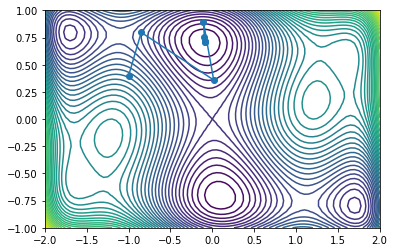

[-0.08984201  0.7126564 ]
n= 7


In [126]:
sol_paths(f, [path],(-2,2.05),(-1,1.05))
print(sol)
print('n=',n)

## 2.3: THE ROSENBROCK FUNCTION